In [24]:
# for data analytics
import numpy as np
import pandas as pd  

# The two packages below are for plotting
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [25]:
import os
os.environ["MLFLOW_TRACKING_URI"]="https://dagshub.com/analyst-jithesh/test2.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"]="analyst-jithesh"
os.environ["MLFLOW_TRACKING_PASSWORD"]="37806d2ec52f2a1667267f10ac5447644b20f25e"

In [26]:
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [27]:
#Displaying the top ten rows in the dataset
data.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [29]:
data['Arrival Delay'].isnull().sum()


393

In [30]:
#The missing values are imputed with the mean of the column values.
data['Arrival Delay']=data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [31]:
data.describe()


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [32]:
## multivariate data analysis

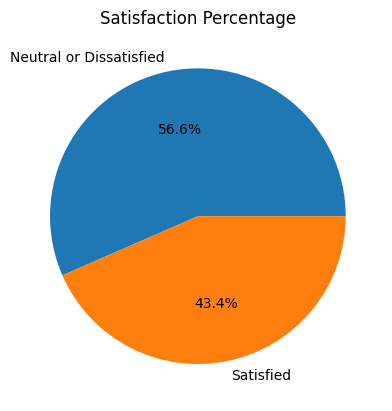

In [33]:
category_counts = data['Satisfaction'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
# Set the title
plt.title('Satisfaction Percentage')
# Display the chart
plt.show()

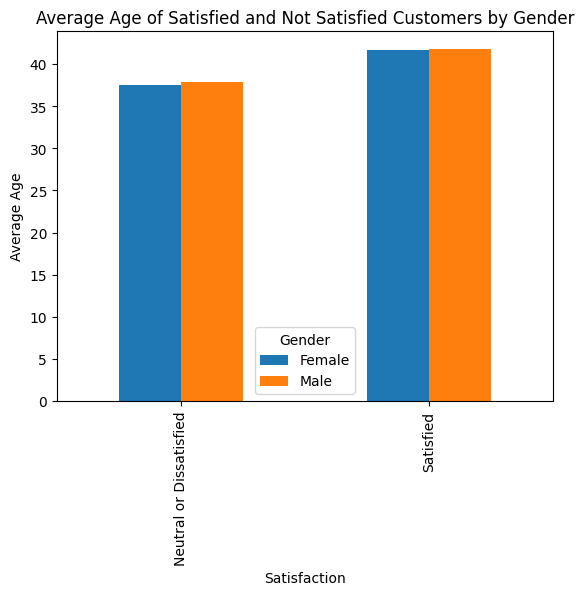

In [34]:
average_age_by_gender = data.groupby(['Satisfaction','Gender'])['Age'].mean().unstack()
average_age_by_gender.plot(kind='bar')

plt.xlabel('Satisfaction')
plt.ylabel('Average Age')
plt.title('Average Age of Satisfied and Not Satisfied Customers by Gender')
plt.show()

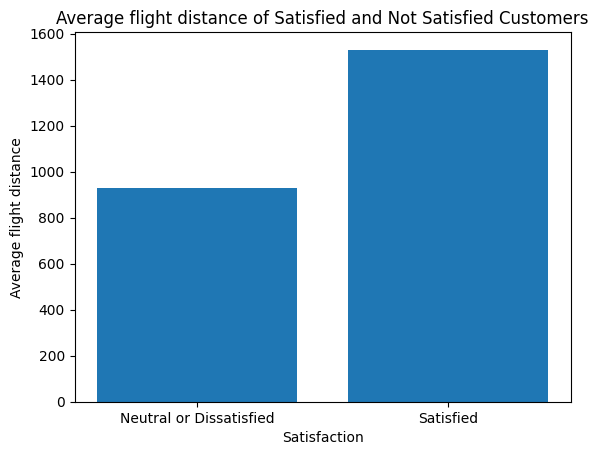

In [35]:
average_flight_distance = data.groupby('Satisfaction')['Flight Distance'].mean()
plt.bar(average_flight_distance.index, average_flight_distance)

plt.xlabel('Satisfaction')
plt.ylabel('Average flight distance')
plt.title('Average flight distance of Satisfied and Not Satisfied Customers')
plt.show()

In [36]:
# Correlation matrix



In [37]:
data['Satisfaction2'] = np.where(data['Satisfaction']== 'Satisfied', 1, 0)
data.drop('Satisfaction', inplace=True, axis=1)
data = data.rename(columns={'Satisfaction2': 'Satisfied'})

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import logging
from urllib.parse import urlparse

In [39]:
##setting up experiments

In [42]:
mlflow.set_experiment("first exp")
mlflow.sklearn.autolog()
X = data.drop(columns = ['Satisfied','ID','Departure Delay'])
y = data['Satisfied']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

remote_server_uri="https://dagshub.com/analyst-jithesh/test2.mlflow"
mlflow.set_tracking_uri(remote_server_uri)
tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

with mlflow.start_run(run_name="logit_run0.7") as run:
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    pred=logreg.predict(X_test)
    y_pred=np.where(pred>0.7,1,0)
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric(key="f1_score",value=f1)
    mlflow.log_artifact("logit_notebook.ipynb")

2023/09/12 10:40:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID b890dfa73262490bb992959132eeed06. Failed operations: [RestException("INTERNAL_ERROR: Response: {\'error\': \'unsupported endpoint, please contact support@dagshub.com\'}")]')]


In [23]:
# with mlflow.start_run(run_name="logit_run3") as run:
#     logreg = LogisticRegression() 
#     logreg.fit(X_train, y_train)
#     pred=logreg.predict(X_test)
#     y_pred=np.where(pred>0.5,1,0)
#     f1 = f1_score(y_test, y_pred)
#     mlflow.log_metric(key="f1_score",value=f1)
#     mlflow.log_artifact("logit_notebook.ipynb")

#     remote_server_uri="https://dagshub.com/analyst-jithesh/test2.mlflow"
#     mlflow.set_tracking_uri(remote_server_uri)

#     tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

#     if tracking_url_type_store != "file":

#         mlflow.sklearn.log_model(
#             logreg, "model", registered_model_name="ex2"
#         )
#     else:
#          mlflow.sklearn.log_model(logreg, "model")

MlflowException: API request to https://dagshub.com/analyst-jithesh/test2.mlflow/api/2.0/mlflow/runs/create failed with exception HTTPSConnectionPool(host='dagshub.com', port=443): Max retries exceeded with url: /analyst-jithesh/test2.mlflow/api/2.0/mlflow/runs/create (Caused by ResponseError('too many 500 error responses'))